In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math
import dask
import glob
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
from dask.distributed import Client, LocalCluster
if __name__ == "__main__":
    cluster=LocalCluster(host="tcp://127.0.0.1:2459",dashboard_address="127.0.0.1:2469",n_workers=4)
    client = Client(cluster)

In [3]:
files = glob.glob("../FRONT_FILES/native/seasonal/*.nc")

In [4]:
models = []
for file in files:
    models.append(file.split('/')[-1].split('_')[0])

In [5]:
two_deg = xr.open_dataset('../FRONT_FILES/2deg/seasonal/ERA5_seasonal_fronts_2deg.nc')
new_lat = two_deg.lat.values
new_lon = two_deg.lon.values

In [6]:
dic = {}
for model,file in zip(models,files):
    print(model)
    dic[model] = xr.open_dataset(file)
    dic[model] = dic[model].rename({'__xarray_dataarray_variable__':'front'})
    dic[model] = dic[model].front.fillna(0)
    dic[model] = dic[model].sortby('lat')
    dic[model] = dic[model].sortby('lon')
    dic[model] = dic[model].sel(time = slice('1981-03-01','2005-11-30'))
    dic[model] = dic[model].groupby(dic[model].time.dt.season).mean(dim='time',skipna=True)
    dic[model] = dic[model].interp(lat=new_lat, lon=new_lon,method='linear')
    dic[model] = dic[model].fillna(0)
    dic[model] = dic[model].sel(lat = slice(-60,-25))
    dic[model] = dic[model].sel(lon = slice(-30,10))
    dic[model] = dic[model]/(np.max(dic[model].values))

MRI-ESM1
bcc-csm1-1-m
CNRM-CM5
GFDL-ESM2M
ACCESS1-0
BNU-ESM
bcc-csm1-1
ACCESS1-3
MIROC-ESM
NOAA
IPSL-CM5A-MR
GFDL-ESM2G
GFDL-CM3
IPSL-CM5A-LR
MIROC5
MIROC-ESM-CHEM
MIROC4h
ERA5
MRI-CGCM3


In [7]:
import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [8]:
levels = np.linspace(0, 1, 101) 

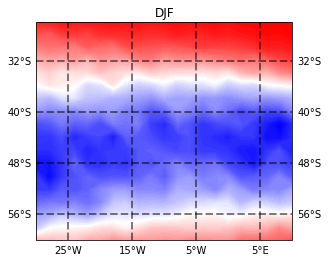

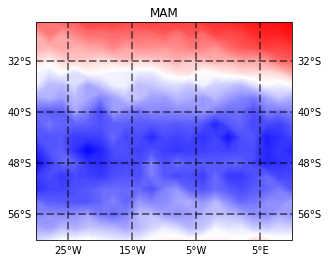

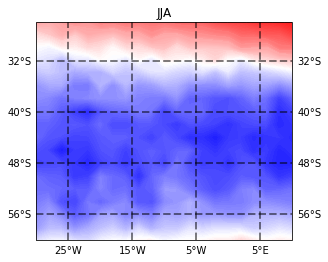

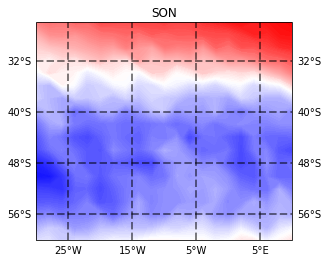

In [9]:
for index in ['NOAA']:
    for seas in ['DJF','MAM','JJA','SON']:
        ax = plt.axes(projection=ccrs.PlateCarree())
        #ax.coastlines('50m', linewidth=0.8)
        a = ax.contourf(dic[index].lon.values,dic[index].lat.values,dic[index].sel(season = seas).values,levels = levels,cmap='bwr_r')
        for c in a.collections:
            c.set_edgecolor("face")
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
        gl.top_labels = False
        gl.left_lables = False
        gl.right_labels=True
        gl.xlines = True
        gl.xlocator = mticker.FixedLocator([-25,-15,-5,5,15])
        gl.ylocator = mticker.FixedLocator([-32,-40,-48,-56])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        plt.title(str(seas))
        plt.savefig('../FRONT_OUT/seasonality/'+str(index)+'_'+str(seas)+".png")
        plt.savefig('../FRONT_OUT/seasonality/'+str(index)+'_'+str(seas)+".pdf")
        plt.show()



<ipython-input-10-cf555717820b>:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(a)


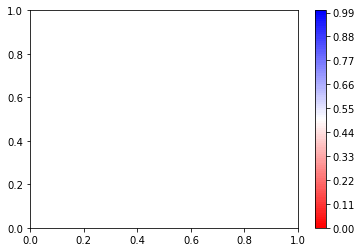

In [10]:
plt.colorbar(a)
plt.savefig('../FRONT_OUT/seasonality/seasonality_cbar.pdf',orientation= 'horizontal')

In [11]:
levels = np.linspace(-1, 1, 201) 

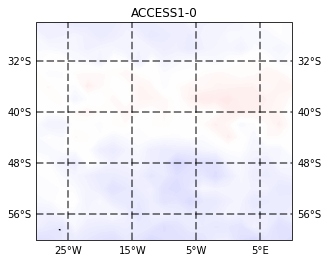

In [12]:
#for index in dic:
for index in ['ACCESS1-0']:
    if index == 'NOAA':
        pass
    else: 
        ref = dic['NOAA'].mean(dim='season')
        anom = dic[index].mean(dim='season') - ref
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines('50m', linewidth=0.8)
        a = ax.contourf(anom.lon.values,anom.lat.values,anom.values,levels = levels, cmap = 'bwr_r')
        for c in a.collections:
            c.set_edgecolor("face") 
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
        gl.top_labels = False
        gl.left_lables = False
        gl.right_labels=True
        gl.xlines = True
        gl.xlocator = mticker.FixedLocator([-25,-15,-5,5,15])
        gl.ylocator = mticker.FixedLocator([-32,-40,-48,-56])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER        
        plt.title(str(index))
        plt.savefig('../FRONT_OUT/annual_1981/'+str(index)+"_annual_1981.png")
        plt.savefig('../FRONT_OUT/annual_1981/'+str(index)+"_annual_1981.pdf")
        #plt.close()
        plt.show()

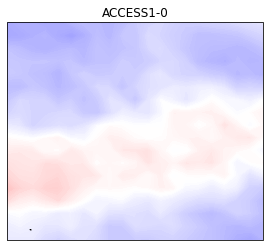

In [13]:
#for index in dic:
for index in ['ACCESS1-0']:
    ref = dic[index].sel(season = 'DJF')
    anom = dic[index].sel(season = 'JJA') - ref
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines('50m', linewidth=0.8) 
    a = ax.contourf(anom.lon.values,anom.lat.values,anom.values,levels = levels, cmap = 'bwr_r')
    for c in a.collections:
        c.set_edgecolor("face")
    plt.title(str(index))
    plt.savefig('../FRONT_OUT/seasonality/'+str(index)+"_seasonality.png")
    plt.savefig('../FRONT_OUT/seasonality/'+str(index)+"_seasonality.pdf")
    #plt.close()
    plt.show()

<ipython-input-14-0f3e4a24ada3>:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(a)


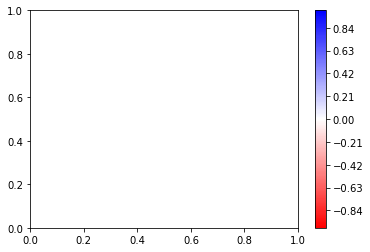

In [14]:
plt.colorbar(a)
plt.savefig('../FRONT_OUT/anom_cbar.pdf')

In [15]:
files = glob.glob("../FRONT_FILES/2deg/seasonal/*")

In [16]:
models = []
for file in files:
    models.append(file.split('/')[-1].split('_')[0])

In [17]:
dic = {}
for model,file in zip(models,files):
    print(model)
    dic[model] = xr.open_dataset(file)
    dic[model] = dic[model].rename({'__xarray_dataarray_variable__':'front'})
    dic[model] = dic[model].front.fillna(0)
    dic[model] = dic[model].sel(lat = slice(-60,-25))
    dic[model] = dic[model].sel(lon = slice(-30,10))
    dic[model] = dic[model].sortby('lat')
    dic[model] = dic[model].sortby('lon')
    dic[model] = dic[model].groupby(dic[model].time.dt.season).mean(dim='time',skipna=True)
    dic[model] = dic[model]/(np.max(dic[model].values))

GFDL-ESM2M
bcc-csm1-1-m
MRI-CGCM3
CNRM-CM5
MRI-ESM1
GFDL-ESM2G
IPSL-CM5A-MR
BNU-ESM
ERA5
GFDL-CM3
ACCESS1-0
ACCESS1-3
NOAA
MIROC-ESM-CHEM
MIROC4h
bcc-csm1-1
MIROC5
MIROC-ESM
IPSL-CM5A-LR


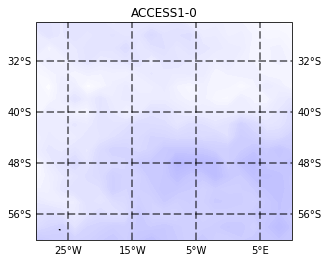

In [18]:
#for index in dic:
for index in ['ACCESS1-0']:
    if index == 'NOAA':
        pass
    else: 
        ref = dic['NOAA'].mean(dim='season')
        anom = dic[index].mean(dim='season') - ref
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines('50m', linewidth=0.8)
        a = ax.contourf(anom.lon.values,anom.lat.values,anom.values,levels = levels, cmap = 'bwr_r')
        for c in a.collections:
            c.set_edgecolor("face")   
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
        gl.top_labels = False
        gl.left_lables = False
        gl.right_labels=True
        gl.xlines = True
        gl.xlocator = mticker.FixedLocator([-25,-15,-5,5,15])
        gl.ylocator = mticker.FixedLocator([-32,-40,-48,-56])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        plt.title(str(index))
        plt.savefig('../FRONT_OUT/annual_2deg/'+str(index)+"_annual_2deg.png")
        plt.savefig('../FRONT_OUT/annual_2deg/'+str(index)+"_annual_2deg.pdf")
        #plt.close()
        plt.show()

In [19]:
client.close()